### Importação das bibliotecas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#### Leitura do arquivo

In [3]:
df = pd.read_csv("./datasets/data.csv", sep=",")
df

,filename,r_mean,g_mean,b_mean,r_std,g_std,b_std,h_mean,v_mean,h_std,v_std,quality
0,imagens/selecionadas/boa_qualidade/3391453209.jpg,132.609966,121.227249,124.231548,77.783824,69.308145,67.421205,13.189166,13.277505,20.334358,21.528245,1
1,imagens/selecionadas/boa_qualidade/3274691778.jpg,66.165817,44.555141,16.569908,69.099801,57.499889,38.438030,5.298978,7.668856,10.649066,16.816179,1
2,imagens/selecionadas/boa_qualidade/3363342011.jpg,77.994858,70.928452,81.287174,95.512351,83.056987,65.150531,4.711894,7.193683,8.418819,13.501021,1
3,imagens/selecionadas/boa_qualidade/3359563671.jpg,75.615658,79.028858,88.636810,38.806435,37.705454,40.135014,3.963080,5.991780,9.907831,13.684910,1
4,imagens/selecionadas/boa_qualidade/3307667255.jpg,112.128551,98.476761,86.907909,67.015909,65.093914,64.762853,8.664269,14.697718,14.127406,23.532887,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2095,imagens/selecionadas/escuras_ruins/2015_03985.jpg,25.093895,24.500557,22.681580,24.635103,23.453142,22.314595,1.650287,1.694096,5.943454,8.405698,0
2096,imagens/selecionadas/escuras_ruins/2015_05839.jpg,16.278244,16.098171,16.927536,26.044997,25.645297,23.383744,0.821251,0.943275,3.102364,3.638713,0
2097,imagens/selecionadas/escuras_ruins/2015_00176.jpg,40.049698,12.688789,3.469101,37.774832,21.465189,8.702481,3.820762,3.532297,7.436229,7.322762,0
2098,imagens/selecionadas/escuras_ruins/2015_03045.png,29.009560,26.468601,24.881416,42.588287,41.339594,40.756837,1.746537,3.285583,5.360037,10.139739,0


#### Manipulações no arquivo

In [4]:
condicao = [df.quality == 1,
            df.quality == 0
            ]

resultados = ['boa_qualidade', 'ma_qualidade']

df['quality_tag'] = np.select(condicao, resultados)
df

,filename,r_mean,g_mean,b_mean,r_std,g_std,b_std,h_mean,v_mean,h_std,v_std,quality,quality_tag
0,imagens/selecionadas/boa_qualidade/3391453209.jpg,132.609966,121.227249,124.231548,77.783824,69.308145,67.421205,13.189166,13.277505,20.334358,21.528245,1,boa_qualidade
1,imagens/selecionadas/boa_qualidade/3274691778.jpg,66.165817,44.555141,16.569908,69.099801,57.499889,38.438030,5.298978,7.668856,10.649066,16.816179,1,boa_qualidade
2,imagens/selecionadas/boa_qualidade/3363342011.jpg,77.994858,70.928452,81.287174,95.512351,83.056987,65.150531,4.711894,7.193683,8.418819,13.501021,1,boa_qualidade
3,imagens/selecionadas/boa_qualidade/3359563671.jpg,75.615658,79.028858,88.636810,38.806435,37.705454,40.135014,3.963080,5.991780,9.907831,13.684910,1,boa_qualidade
4,imagens/selecionadas/boa_qualidade/3307667255.jpg,112.128551,98.476761,86.907909,67.015909,65.093914,64.762853,8.664269,14.697718,14.127406,23.532887,1,boa_qualidade
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,imagens/selecionadas/escuras_ruins/2015_03985.jpg,25.093895,24.500557,22.681580,24.635103,23.453142,22.314595,1.650287,1.694096,5.943454,8.405698,0,ma_qualidade
2096,imagens/selecionadas/escuras_ruins/2015_05839.jpg,16.278244,16.098171,16.927536,26.044997,25.645297,23.383744,0.821251,0.943275,3.102364,3.638713,0,ma_qualidade
2097,imagens/selecionadas/escuras_ruins/2015_00176.jpg,40.049698,12.688789,3.469101,37.774832,21.465189,8.702481,3.820762,3.532297,7.436229,7.322762,0,ma_qualidade
2098,imagens/selecionadas/escuras_ruins/2015_03045.png,29.009560,26.468601,24.881416,42.588287,41.339594,40.756837,1.746537,3.285583,5.360037,10.139739,0,ma_qualidade


### Análises gerais

Ideias de análises - Estatísticas básicas:
  * Visualização exploratória. ok
  * Representação adequada dos dados. ok
  * Normalização dos dados. ok
  * Dados discrepantes (outliers)? ok
  * Dados faltantes? ok
  * Seleção/combinação de atributos? ok
  * Dados desbalanceados? Subamostragem? Sobreamostragem? ok

#### Análise de dados faltantes

<AxesSubplot:>

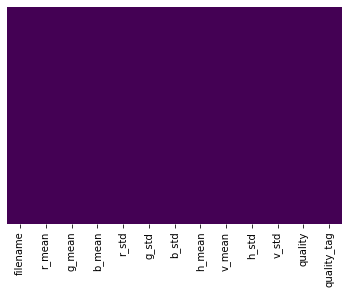

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

#### Análise de desbalanceamento

In [6]:
# Verificação dos tipos de imagem e da proporção de amostras por classe
contagem = df.quality_tag.value_counts()
proporcao = (contagem / len(df))*100 

pd.DataFrame({'Classe': contagem.index, 'Contagem': contagem.values, 'Proporção': proporcao.values})

,Classe,Contagem,Proporção
0,boa_qualidade,1050,50.0
1,ma_qualidade,1050,50.0


#### Análise dos dados por tipo de categoria de imagem

In [7]:
# Descrição geral dos dados
df.describe()

,r_mean,g_mean,b_mean,r_std,g_std,b_std,h_mean,v_mean,h_std,v_std,quality
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,95.359312,88.014077,80.282106,54.658121,51.870336,50.783907,6.246112,6.462432,10.835180,11.521877,0.500000
std,46.558388,46.942458,48.543839,17.791502,17.417658,20.060512,3.884642,4.335191,5.591048,6.602253,0.500119
min,0.407383,0.543880,0.714695,4.529520,4.409185,2.473228,0.429284,0.396105,0.530823,0.502865,0.000000
25%,56.917073,45.460307,35.642459,43.187515,40.995656,36.785335,3.436799,3.289612,6.453927,5.936361,0.000000
50%,101.258001,92.609028,81.456106,55.641331,52.392981,51.577539,5.145042,5.227004,10.147909,10.697539,0.500000
75%,130.786313,125.100592,117.632441,67.500018,64.409497,65.091631,8.143663,8.595390,14.243166,16.020653,1.000000
max,220.176311,214.544300,223.166931,106.034132,106.656849,106.440737,24.639619,30.877140,38.580063,39.951795,1.000000


In [8]:
df[df.quality_tag == 'boa_qualidade'].describe()

,r_mean,g_mean,b_mean,r_std,g_std,b_std,h_mean,v_mean,h_std,v_std,quality
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.0
mean,97.861806,88.336697,78.833462,60.841979,56.332617,54.194322,8.349942,8.996917,14.034318,15.629714,1.0
std,38.334611,40.627809,44.712394,14.664127,14.753294,17.958411,3.976756,4.391465,4.998635,5.590044,0.0
min,13.929787,10.871216,2.673965,19.064368,16.364799,5.237776,1.867893,1.654220,2.927033,3.285227,1.0
25%,67.935301,52.916490,41.419832,51.030682,46.022276,41.901608,5.277353,5.724532,10.528867,11.680713,1.0
50%,97.321951,87.764462,75.042103,60.889594,56.355962,54.133265,7.521892,8.066711,13.329952,15.081564,1.0
75%,126.382279,118.876439,109.218872,71.232760,66.254343,67.381853,10.556947,11.152828,17.192813,18.933225,1.0
max,219.476212,214.544300,223.166931,106.034132,106.656849,106.440737,24.639619,30.877140,36.528616,39.951795,1.0


In [9]:
df[df.quality_tag == 'ma_qualidade'].describe()

,r_mean,g_mean,b_mean,r_std,g_std,b_std,h_mean,v_mean,h_std,v_std,quality
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.0
mean,92.856818,87.691458,81.730749,48.474263,47.408056,47.373493,4.142281,3.927948,7.636042,7.414039,0.0
std,53.435514,52.521064,52.075481,18.487485,18.695382,21.434629,2.349478,2.336929,4.132142,4.710800,0.0
min,0.407383,0.543880,0.714695,4.529520,4.409185,2.473228,0.429284,0.396105,0.530823,0.502865,0.0
25%,36.669956,32.934556,28.398522,35.142279,33.180597,30.078861,2.619486,2.429367,4.717754,4.067689,0.0
50%,104.772112,99.489138,89.125000,48.888811,48.540610,49.118431,3.651268,3.393197,6.853682,6.115039,0.0
75%,137.084613,130.082506,123.234442,62.282629,60.758375,62.792105,5.040019,4.743502,9.650981,9.486137,0.0
max,220.176311,208.023514,202.883232,97.059508,97.059508,98.168615,23.859176,21.381397,38.580063,36.470405,0.0


#### Análise de visualização exploratória

##### Boxplot

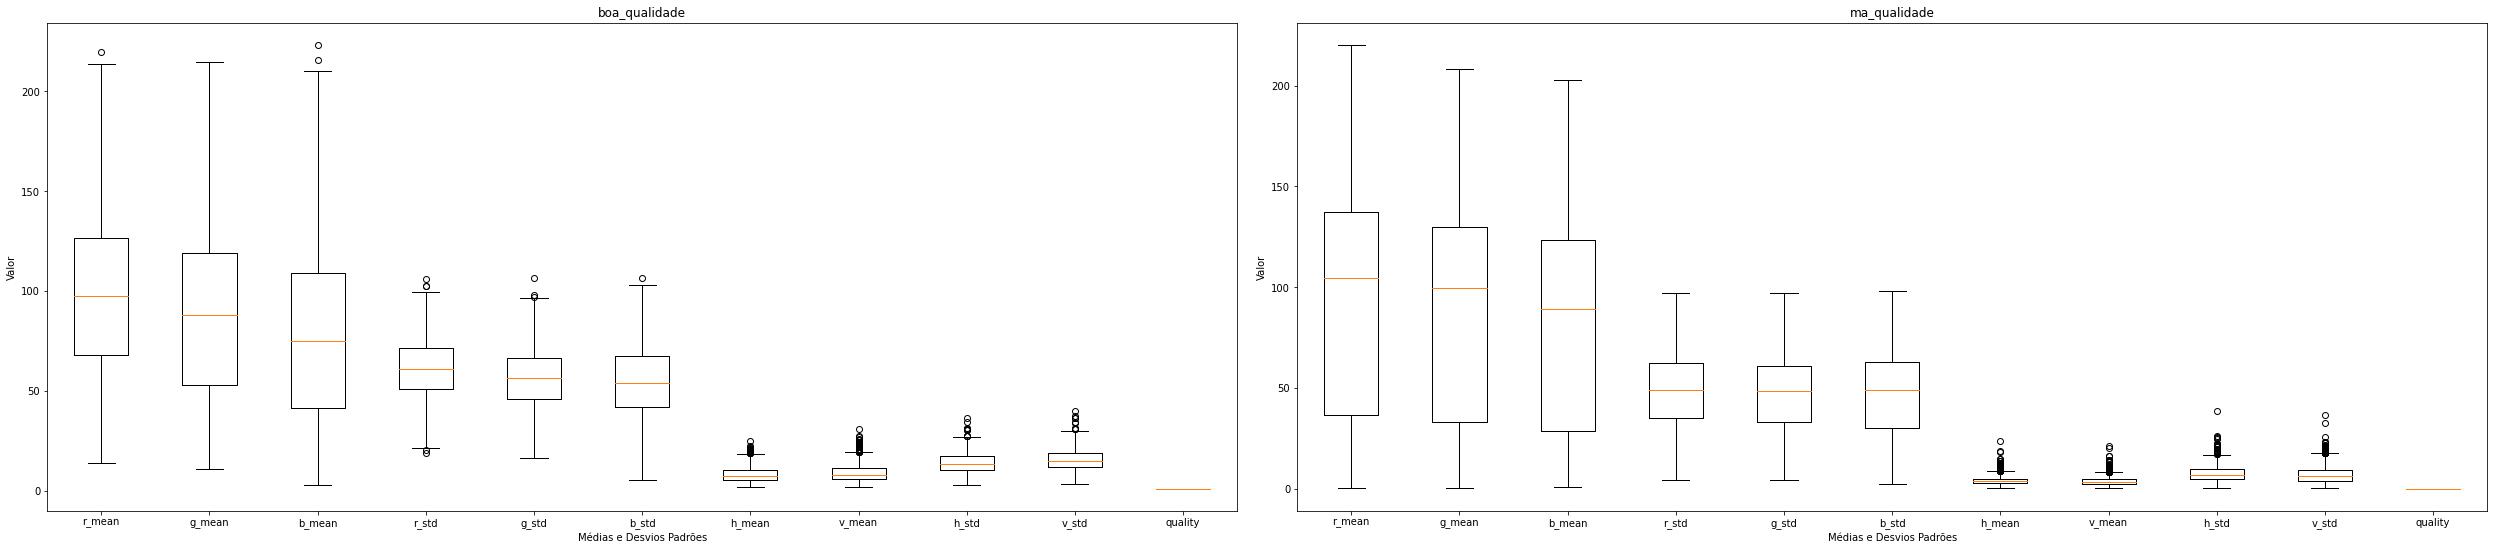

In [10]:
# Lista de classes
classes = df['quality_tag'].unique()

# Configurações do gráfico
fig, axs = plt.subplots(nrows=1, ncols=len(classes), figsize=(35,8))

# Traçar boxplot para cada classe
for i, classe in enumerate(classes):
    subset = df[df['quality_tag'] == classe].iloc[:, 1:-1]
    labels = subset.columns.tolist()
    data = [subset[col].values for col in labels]
    axs[i].boxplot(data, labels=labels)
    axs[i].set_title(classe)
    axs[i].set_ylabel('Valor')
    axs[i].set_xlabel('Médias e Desvios Padrões')

plt.tight_layout(pad=2.0)
plt.show()


#### Comportamento da Média e do Desvio Padrão

In [11]:
def plot_line_graphs(df, means, std, colors_mean, colors_std, classes):
    fig, axs = plt.subplots(nrows=2, ncols=len(classes), figsize=(30,10))

    # Traçar gráfico de linhas para cada classe
    for i, classe in enumerate(classes):
        subset = means[df['quality_tag'] == classe]
        for col in subset.columns:
            axs[0, i].plot(range(len(subset)), subset[col], marker='o', label=col, color=colors_mean[col])
        axs[0, i].set_title(classe)
        axs[0, i].set_ylabel('Valor')
        axs[0, i].set_xlabel('Médias')
        axs[0, i].legend()

        subset = std[df['quality_tag'] == classe]
        for col in subset.columns:
            axs[1, i].plot(range(len(subset)), subset[col], marker='o', label=col, color=colors_std[col])
        axs[1, i].set_title(classe)
        axs[1, i].set_ylabel('Valor')
        axs[1, i].set_xlabel('Desvios Padrões')
        axs[1, i].legend()

    plt.tight_layout(pad=2.0)
    plt.show()

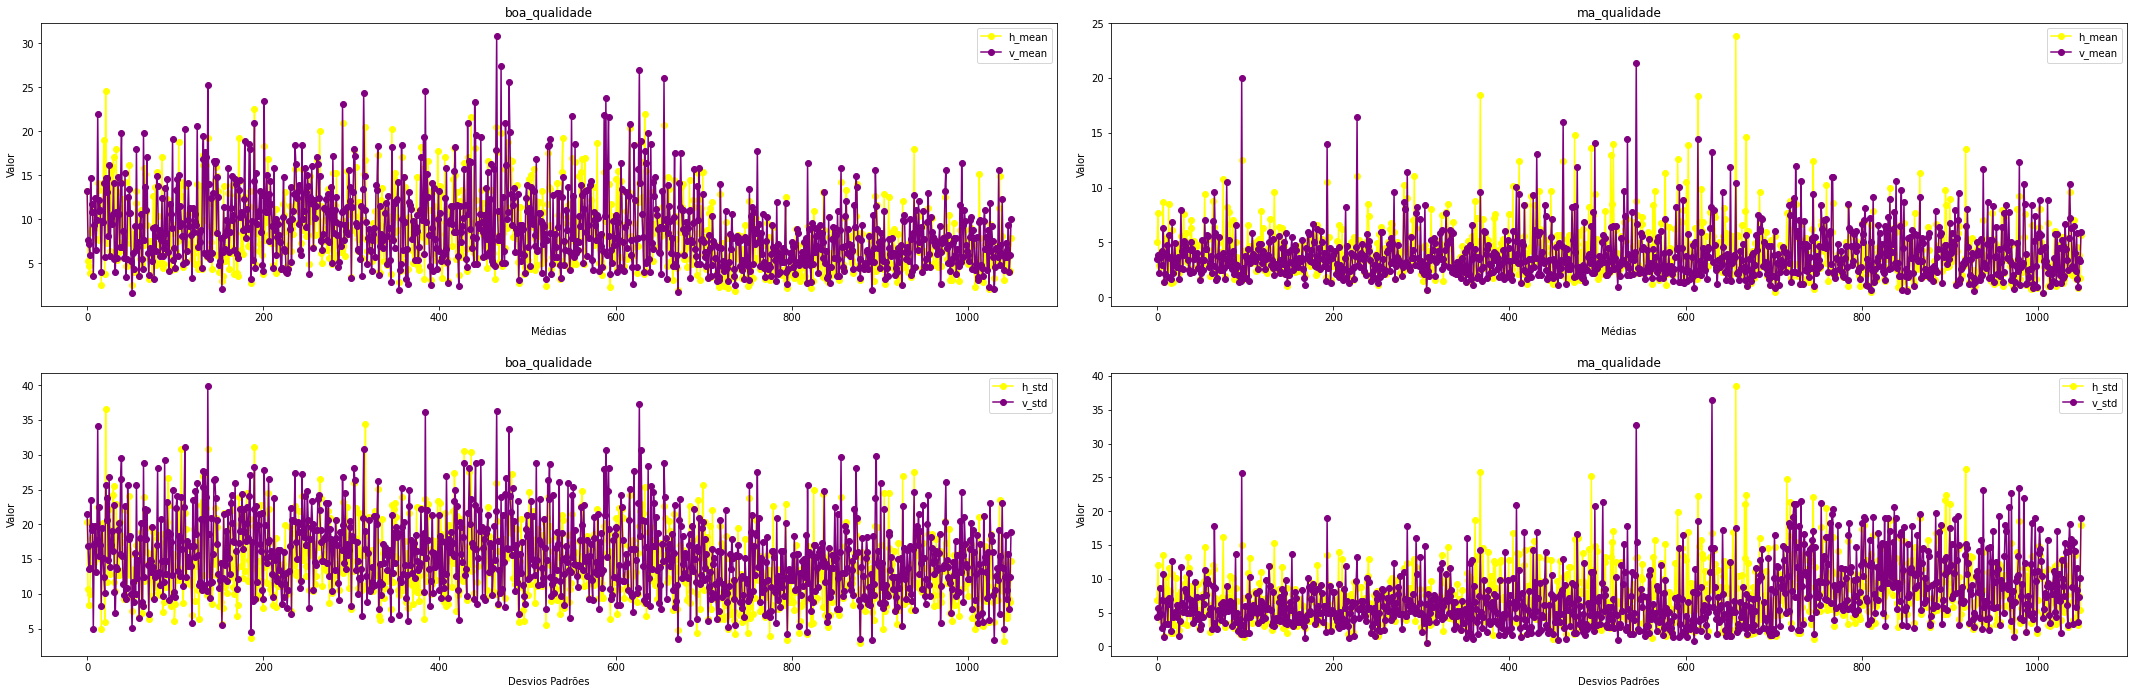

In [12]:

classes = df.quality_tag.unique()
means = df[['h_mean', 'v_mean']]
std = df[['h_std', 'v_std']]
colors_means = {'h_mean': 'yellow', 'v_mean': 'purple'}
colors_std = {'h_std': 'yellow', 'v_std': 'purple'}

plot_line_graphs(df, means, std, colors_means, colors_std, classes)

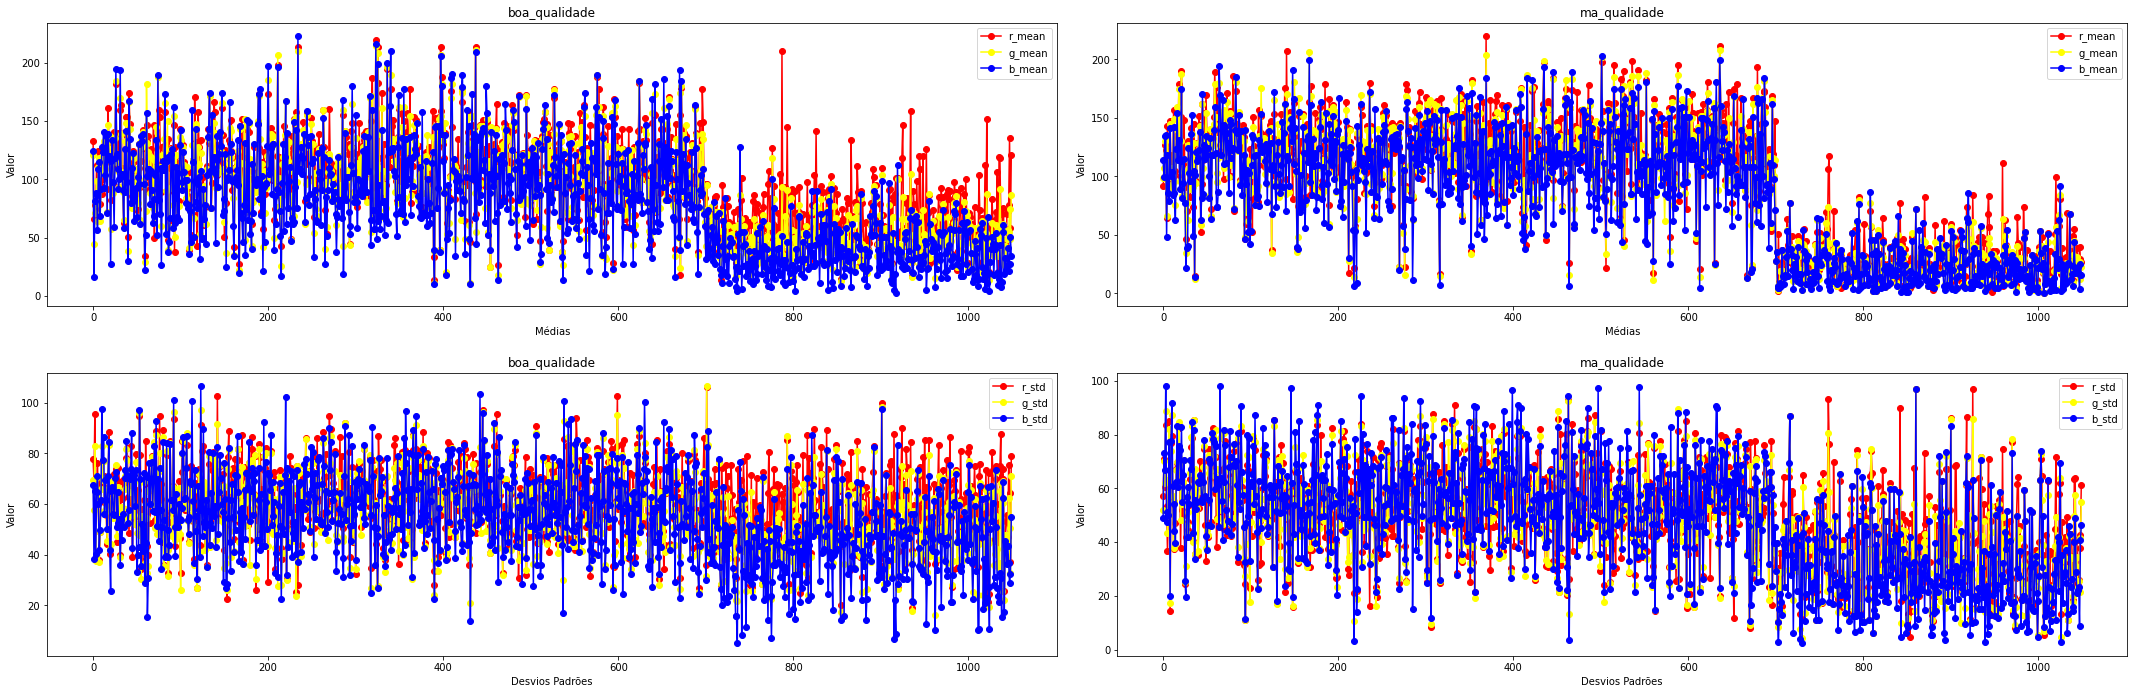

In [13]:
classes = df.quality_tag.unique()
means = df[['r_mean', 'g_mean', 'b_mean']]
std = df[['r_std', 'g_std', 'b_std']]
colors_means ={'r_mean': 'red', 'g_mean': 'yellow', 'b_mean': 'blue'}
colors_std = {'r_std': 'red', 'g_std': 'yellow', 'b_std': 'blue'}

plot_line_graphs(df, means, std, colors_means, colors_std, classes)


##### Heatmap da correlação entre as colunas

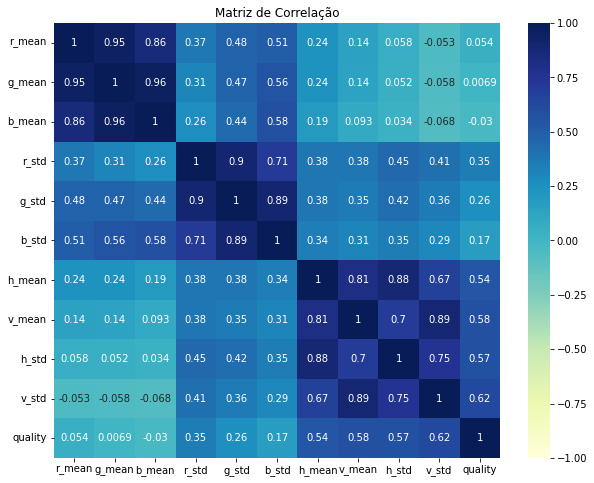

In [14]:
# Define as correlações
df_correlacao = df.corr()

# Cria o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(df_correlacao, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

#### Normalização dos dados

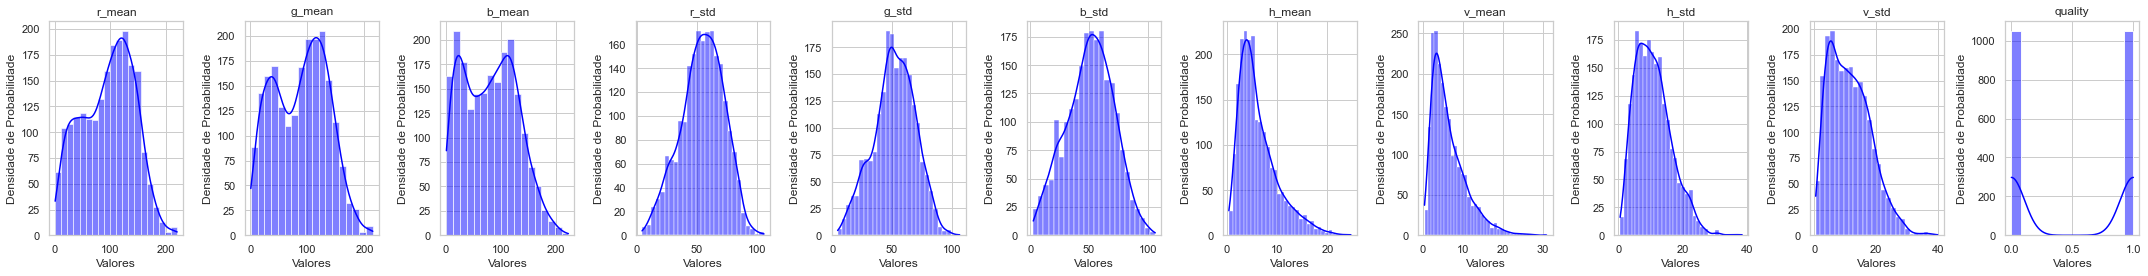

In [15]:
# Selecionar as colunas do DataFrame (excluindo a primeira e a última coluna)
data = df.iloc[:, 1:-1]

# Configurações de estilo do seaborn
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(nrows=1, ncols=data.shape[1], figsize=(30, 4))

for i, col in enumerate(data.columns):
    sns.histplot(data=data, x=col, kde=True, color="blue", ax=axs[i])
    axs[i].set_xlabel('Valores')
    axs[i].set_ylabel('Densidade de Probabilidade')
    axs[i].set_title(col)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

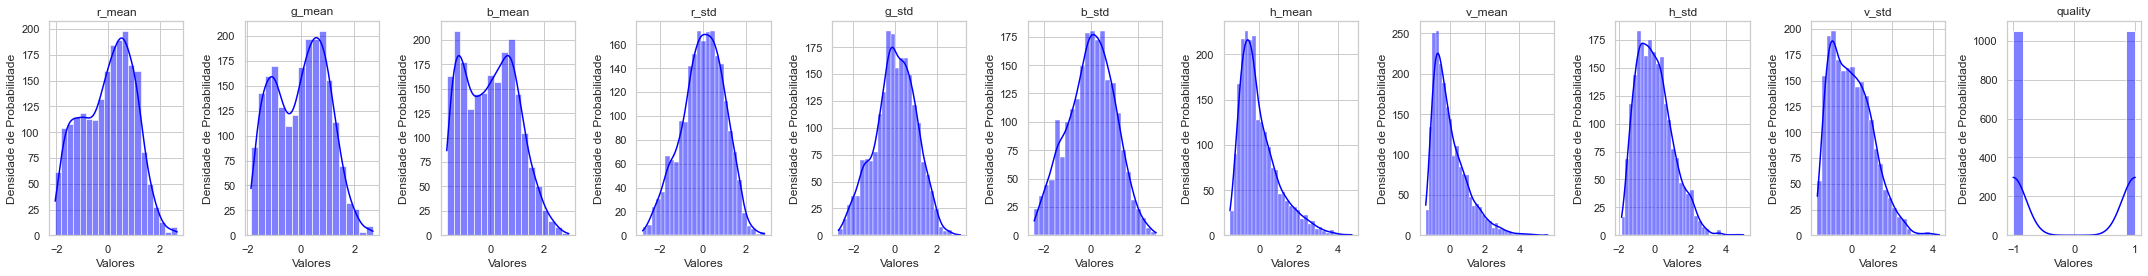

In [16]:
data = df.iloc[:, 1:-1]

# Criar uma instância do StandardScaler
scaler = StandardScaler()

# Normalizar as colunas do DataFrame
df_normalized = scaler.fit_transform(data)

# Criar um novo DataFrame a partir dos dados normalizados
df_normalized = pd.DataFrame(df_normalized, columns=data.columns)

# Configurações de estilo do seaborn
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(nrows=1, ncols=df_normalized.shape[1], figsize=(30, 4))

for i, col in enumerate(df_normalized.columns):
    sns.histplot(data=df_normalized, x=col, kde=True, color="blue", ax=axs[i])
    axs[i].set_xlabel('Valores')
    axs[i].set_ylabel('Densidade de Probabilidade')
    axs[i].set_title(col)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

#### Distribuição dos dados

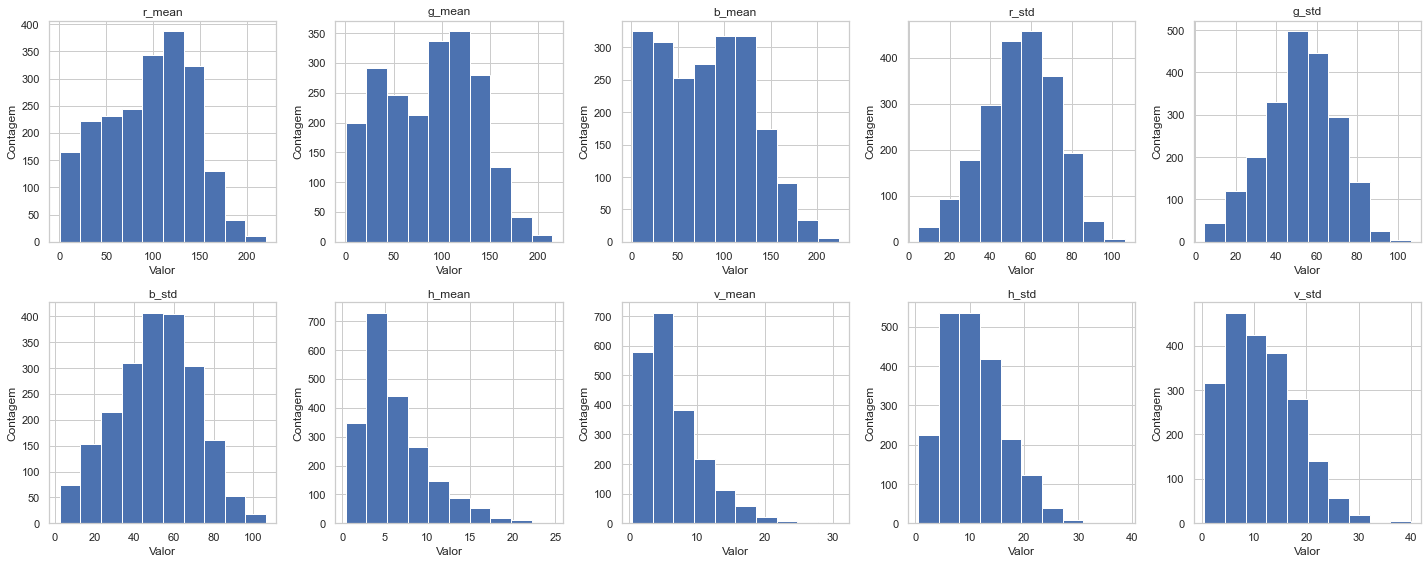

In [29]:
# Categorias
categories = ['r_mean', 'g_mean', 'b_mean', 'r_std', 'g_std', 'b_std', 'h_mean', 'v_mean', 'h_std', 'v_std']

# Criar subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Plotar histograma para cada categoria
for i, category in enumerate(categories):
    ax = axes[i]
    data = df[category].values
    counts, bins, _ = ax.hist(data, bins=10)
    ax.set_title(category)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Contagem')

plt.tight_layout()
plt.show()